## Geospatial Visualisation 


In [11]:
pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.2 MB/s eta 0:00:0000:0100:01
  Using cached pyproj-3.6.0-cp310-cp310-macosx_11_0_arm64.whl (4.7 MB)
  Using cached shapely-2.0.1-cp310-cp310-macosx_11_0_arm64.whl (1.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 12.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash import Input, Output, State, ctx, ALL, MATCH
import dash_bootstrap_components as dbc

/var/folders/7n/g71mm5g55c19lblxg8zw_8fw0000gn/T/ipykernel_20256/2629250379.py:10: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/7n/g71mm5g55c19lblxg8zw_8fw0000gn/T/ipykernel_20256/2629250379.py:11: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


### Mapping Wind Power Generation
#### a)

In [2]:
gdf = gp.read_file("districts/VG1000_KRS.shp")
gdf.head()

,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,IBZ,BEM,...,SN_V1,SN_V2,SN_G,FK_S3,NUTS,ARS_0,AGS_0,WSK,DEBKG_ID,geometry
0,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,00,00,000,R,DEF01,010010000000,01001000,2008-01-01,DEBKGDL1000055UK,"POLYGON ((3527924.046 6075754.730, 3527955.026..."
1,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,40,--,...,00,00,000,R,DEF02,010020000000,01002000,2006-01-01,DEBKGDL1000055TK,"POLYGON ((3577255.666 6031939.279, 3577509.282..."
2,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,40,--,...,00,00,000,R,DEF03,010030000000,01003000,2006-02-01,DEBKGDL1000055W1,"POLYGON ((3623798.629 5982634.490, 3623806.046..."
3,4,4,1,01004,01004,010040000000,Neumünster,Kreisfreie Stadt,40,--,...,00,00,000,R,DEF04,010040000000,01004000,1970-04-26,DEBKGDL10000560Q,"POLYGON ((3566670.956 6001187.313, 3566515.888..."
4,4,4,1,01051,01051,010510044044,Dithmarschen,Kreis,42,--,...,00,00,000,R,DEF05,010510000000,01051000,2011-08-01,DEBKGDL10000563M,"MULTIPOLYGON (((3480619.634 5993137.743, 34806..."


<Axes: >

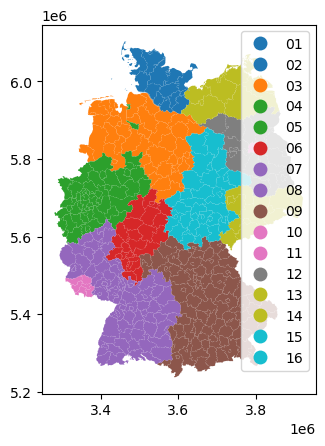

In [3]:
gdf.plot("SN_L",legend=True)

#### b)

<Axes: >

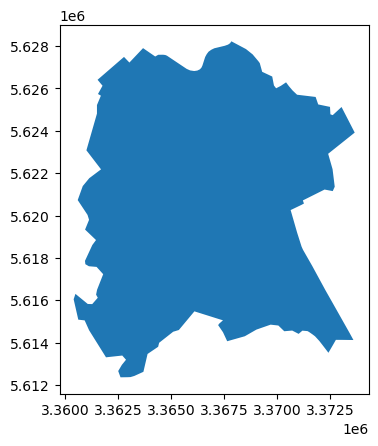

In [4]:
bonn = gdf.loc[gdf["GEN"] == "Bonn","geometry"]
bonn.plot()

#### c)

<Axes: >

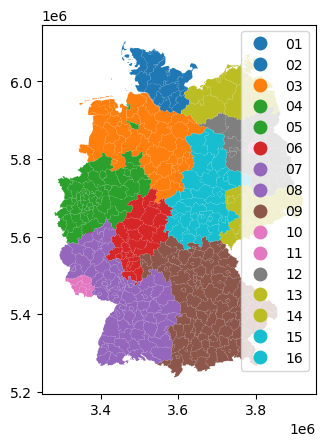

In [5]:
bonnPoint = gdf.loc[gdf["GEN"] == "Bonn","geometry"].centroid
ax = bonnPoint.plot(color="red")
gdf.plot("SN_L",ax=ax,legend=True,linewidth=0.1)

#### d)

In [6]:
df = pd.read_csv('districts/power_generation.csv')
df

,Unnamed: 0.1,Unnamed: 0,status,district,energyType,netRatePower
0,5,5,In Betrieb,3404000.0,Solar radiant energy,24.00
1,8,8,In Betrieb,13075000.0,Solar radiant energy,350.73
2,23,23,In Betrieb,9189000.0,Biomass,180.00
3,28,28,In Betrieb,12061000.0,Solar radiant energy,528.00
4,37,37,In Betrieb,12063000.0,Solar radiant energy,100.00
...,...,...,...,...,...,...
931301,3830476,3830476,In Betrieb,9375000.0,Solar radiant energy,10.50
931302,3830483,3830483,In Betrieb,8215000.0,Solar radiant energy,20.00
931303,3830488,3830488,In Betrieb,8126000.0,Solar radiant energy,12.00
931304,3830500,3830500,In Betrieb,13073000.0,Solar radiant energy,13.00


In [7]:
df.groupby(["district","energyType"])["netRatePower"].sum()

district    energyType          
1001000.0   Natural gas             210323.00
            Solar radiant energy     16021.07
            Storage                    415.00
            hard coal                65800.00
            other gases                769.00
                                      ...    
16077000.0  heat                        20.00
            hydro                      261.00
            other gases                 50.00
            petroleum products        2008.00
            wind                    116525.00
Name: netRatePower, Length: 3554, dtype: float64

#### e)

In [8]:
df1 = df.loc[df["energyType"]=="wind"]
df1 = df1.groupby(["district","energyType"])["netRatePower"].sum()
df1.head()

district   energyType
1001000.0  wind            73310.0
1002000.0  wind               75.0
1003000.0  wind            14650.0
1051000.0  wind          2494025.8
1053000.0  wind           137075.0
Name: netRatePower, dtype: float64

In [9]:
gdf["AGS_0"] = pd.to_numeric(gdf["AGS_0"])

In [10]:
gdf1 = pd.merge(gdf,df1,how="left",left_on='AGS_0',right_on='district')
gdf1.head()

,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,IBZ,BEM,...,SN_V2,SN_G,FK_S3,NUTS,ARS_0,AGS_0,WSK,DEBKG_ID,geometry,netRatePower
0,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,00,000,R,DEF01,010010000000,1001000,2008-01-01,DEBKGDL1000055UK,"POLYGON ((3527924.046 6075754.730, 3527955.026...",73310.0
1,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,40,--,...,00,000,R,DEF02,010020000000,1002000,2006-01-01,DEBKGDL1000055TK,"POLYGON ((3577255.666 6031939.279, 3577509.282...",75.0
2,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,40,--,...,00,000,R,DEF03,010030000000,1003000,2006-02-01,DEBKGDL1000055W1,"POLYGON ((3623798.629 5982634.490, 3623806.046...",14650.0
3,4,4,1,01004,01004,010040000000,Neumünster,Kreisfreie Stadt,40,--,...,00,000,R,DEF04,010040000000,1004000,1970-04-26,DEBKGDL10000560Q,"POLYGON ((3566670.956 6001187.313, 3566515.888...",NaN
4,4,4,1,01051,01051,010510044044,Dithmarschen,Kreis,42,--,...,00,000,R,DEF05,010510000000,1051000,2011-08-01,DEBKGDL10000563M,"MULTIPOLYGON (((3480619.634 5993137.743, 34806...",2494025.8


#### f)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<Axes: >

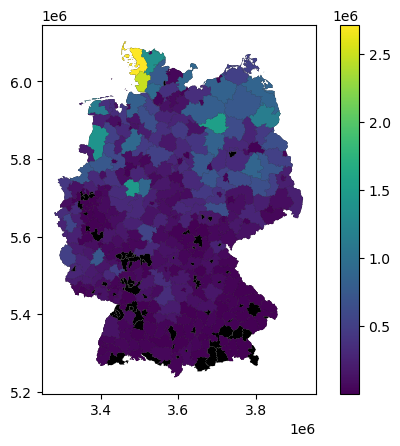

In [11]:
ax = gdf1.plot("SN_L",color="black",legend=False)
gdf1.plot("netRatePower",ax=ax,legend=True)

#### g)

<Axes: >

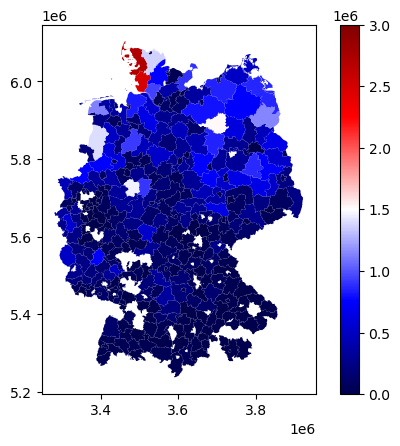

In [12]:
gdf1.plot("netRatePower",legend=True,vmin=0,vmax= 3000000,cmap="seismic")

#### h)

<Axes: >

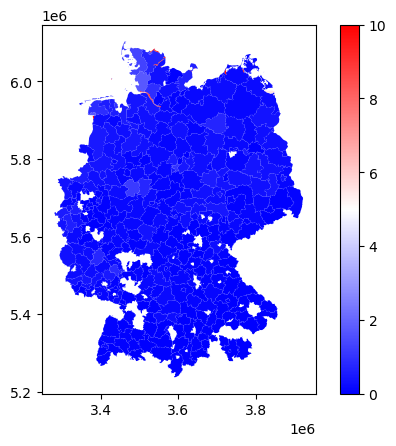

In [13]:
gdf1["area"] = gdf1.area
gdf1["wind"] = np.round(gdf1["netRatePower"]/gdf1["area"]*1000,4)

gdf1.plot("wind",legend=True,vmin=0,vmax=10,cmap="bwr")

#### i)

Most of the wind power is at upper part of Germany.
If the Land has water connection like sea or lagoon, it will produce more wind energy.

### Effectiveness of Animation in Trend Visualization
#### a)

The bottom right subfigure in fig. 1 was was available to the participants in the empirical study and has also been included to illustrate the text in section 2.

#### b)

By using transparency, fading from mostly transparent in the earliest to mostly non-transparent in the latest bubbles of the sequence. same applies to the lines connecting bubbles, so that direction of flow for even smaller bubbles can become possible to perceive . This allows the user to tell which data points correspond to earlier or later years

#### c)

“Select two countries whose infant mortality dropped first, then increased later.”

Rwanda and Iraq.
In small multiple visualisation figure: direction of line or flow clearly show the drop and increase in infant mortality rate of Rwanda country, if we zoom in a little we can see the drop and then increase in infant mortality of Iraq.

Libera also falls in this category but I am not sure as fig is blurry when i zoom in to see.

#### d)

Griffin et al. had found significant advantages in terms of both speed and accuracy for animated maps than the small multiples displays.
But the findings in this paper suggests that the effectiveness of animation and small multiples depends on the particular task and the data at hand. For the sake of showing trends in the data, animation clearly has value and more sense of engagement, especially for presenting smaller dataset. While small multiples is more effective in analysis, and shows fewer errors and less clutters for larger datasets.

#### e)

The first hypothesis: animation will be (a) faster and (b) make fewer errors in the Presentation condition.

First hypothesis Is partially supported by experimental results as experimental results support that animation is faster(15.80s) than small multiples(25.30s) and traces(27.80s) in presentation condition. Thus experimental results support only H1.a.

#### f)

In presentation mode the key goal is to engage the audience and convey the information you(presenter) want to. on the other hand in analysis mode, we(analyst) need to focus on understanding or carefully examine the data, for that small multiple is more effective as it provides statically organised display where different trends can be compared easily. thus, animation can be distracting because of movement and will be needed to replayed yet still it will lead to more errors than small multiples.


#### g)

In terms of engaging the audience and to make your presentations interesting , captivating and  less boring, where deep understanding is not required from audience, one might consider using animation to visualise trends but you need small data and a good presenter as well.

I would prefer small multiples over other two in a scenario where I have a data of multiple countries showing the effect of covid-19 on their economy. In this scenario I would prefer small multiples so the data can be carefully analysed instead of just public amusement.

### Brushing and Linking Between Dynamic Views in Dash
#### a)

In [ ]:
df = pd.read_excel("Data_Cortex_Nuclear.xls")
na_columns = df.isna().sum() > 0
df.loc[:, na_columns.values] = df.loc[:, na_columns.values].fillna(df.loc[:, na_columns.values].mean())
ccss = df[df.loc[:, 'class'] == 'c-CS-s']
tcss = df[df.loc[:, 'class'] == 't-CS-s']
df2 = pd.concat([ccss, tcss])
ccss_features = ccss.drop(columns=['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'])
tcss_features = tcss.drop(columns=['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'])
df2nm = pd.concat((ccss_features , tcss_features))


app = dash.Dash(__name__)

app.layout = html.Div([
    html.Div(children=[
        dcc.RadioItems(
            id='radio',
            options=[
                {'label': 'PCA', 'value': 'PCA'},
                {'label': 'Isomap', 'value': 'Isomap'},
                {'label': 't-SNE', 'value': 't-SNE'}
            ],
            value='PCA',
            inline=True,
            style={'padding': 30,'padding-left': '15%', "width":"35%", 'float': 'left'}
        ),
        html.Br(),
    ]),
    
    html.Div(children=[
        html.Br(),
        html.Button('Add', id='addb', n_clicks=0, style={"width": "80%","height": "40%"}),
    ], style={"width": "15%", 'float': 'right'}),
    
    html.Div(children=[
        html.Label('y-Axis'),
        dcc.Dropdown(
            options=[{'label': i, 'value': i} for i in df2nm.columns],
            value="pPKCAB_N",
            id='dd2',
            style={"width": "80%"}
        ),
    ], style={"width": "15%", 'float': 'right'}),
    
    html.Div(children=[
        html.Label('x-Axis'),
        dcc.Dropdown(
            options=[{'label': i, 'value': i} for i in df2nm.columns],
            value="ITSN1_N",
            id='dd1',
            style={"width": "80%"}
        ),
    ], style={"width": "15%", 'float': 'right'}),
    
    html.Div(children=[      
        dcc.Graph(id='graph', style={"width": "50%", 'float': 'left'}),
        dcc.Graph(id='graph2', style={"width": "50%", 'float': 'right'})
    ]),
    html.Br(),
    html.Div(id='scatterplots-container',
             children=[]),
    
    html.Button("Delete", id="Deletebtn", n_clicks=0, style={"width": "80%","height": "40%"}),

             ])


@app.callback(
    [Output('graph', 'figure'), Output('graph2', 'figure'), Output('scatterplots-container', 'children')],
    [Input('radio', 'value'), Input('dd1', 'value'), Input('dd2', 'value'),
     Input('addb', 'n_clicks'), Input('Deletebtn', 'n_clicks')],
    [State('scatterplots-container', 'children'), State({'type': 'done', 'index': ALL}, 'value')]
)
def update_graph(st_input, nd_input, rd_input, n_clicks, m_clicks, checkboxes, new_children):
    if st_input == 'PCA':
        pca = PCA()
        xpca = pca.fit_transform(df2nm)
        xs = xpca[:, 0]
        ys = xpca[:, 1]
        fig = px.scatter(data_frame=df2, x=xs, y=ys, color="class")
        fig2 = px.scatter(data_frame=df2nm, x=df2nm[nd_input], y=df2nm[rd_input])
    elif st_input == 'Isomap':
        isomap = Isomap(n_neighbors=10, n_components=2)
        xiso = isomap.fit_transform(df2nm)
        xss = xiso[:, 0]
        yss = xiso[:, 1]
        fig = px.scatter(data_frame=df2, x=xss, y=yss, color="class")
        fig2 = px.scatter(data_frame=df2nm, x=df2nm[nd_input], y=df2nm[rd_input])
    elif st_input == 't-SNE':
        tsne = TSNE(n_components=2, perplexity=5)
        xtsne = tsne.fit_transform(df2nm)
        xsss = xtsne[:, 0]
        ysss = xtsne[:, 1]
        fig = px.scatter(data_frame=df2, x=xsss, y=ysss, color="class")
        fig2 = px.scatter(data_frame=df2nm, x=df2nm[nd_input], y=df2nm[rd_input])
    if "addb" == ctx.triggered_id:
        new_scatterplot = html.Div(
                style={'width': '30%', 'display': 'inline-block', 'padding': 10},
                children=[
                    dcc.Checklist(
                        options=[{"label": "", "value": "done"}],
                            id={"index": n_clicks, "type": "done"},
                            style={'margin-left': '200px'}
                            ),
                    dcc.Graph(
                            id={'type': 'dynamic-graph', 'index': n_clicks},
                            figure=px.scatter(df2nm, x=df2nm[nd_input], y=df2nm[rd_input])
                            )
                        ]
                    )
        new_children.append(new_scatterplot)

    if "Deletebtn" == ctx.triggered_id:
        for i, values in enumerate(checkboxes):
            if len(values) == 1: 
                children.pop(i)
    return fig, fig2, new_children


if __name__ == '__main__':
    app.run_server()

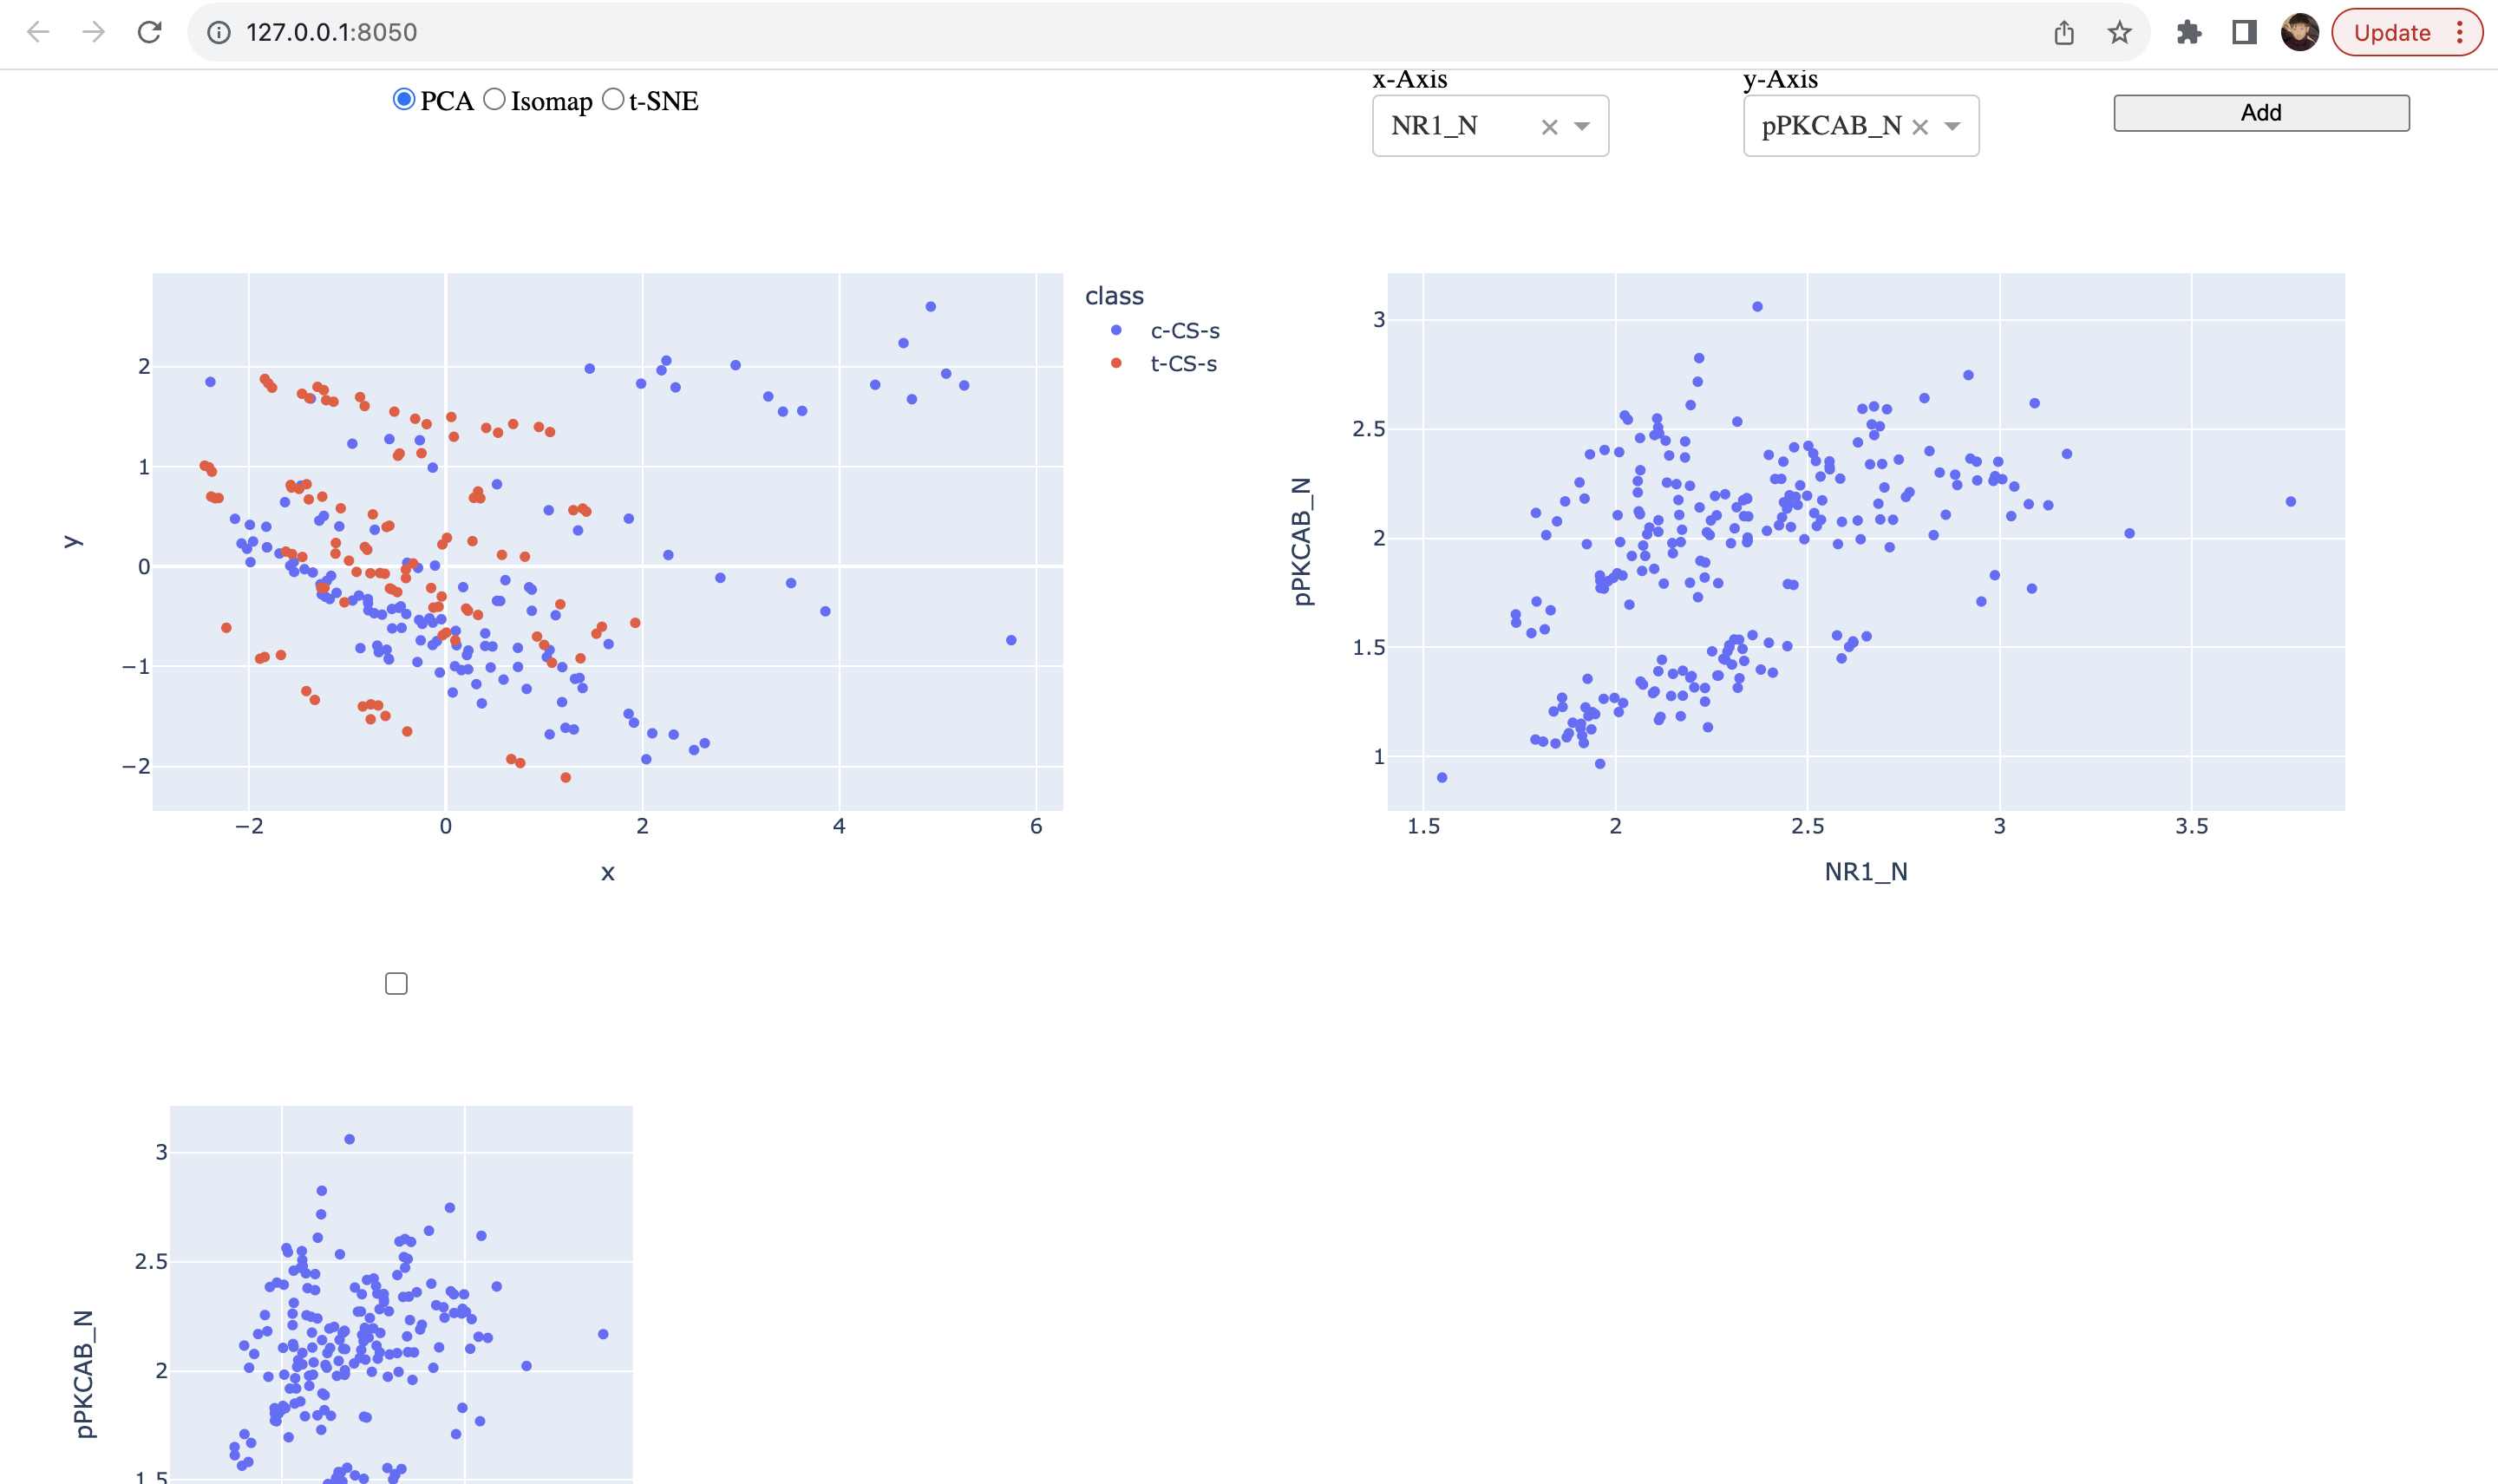